# Проект [EDA, работа с признаками и визуализация]

1. Импорт необходимых библиотек:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

2. Чтение данных:

In [ ]:
data = pd.read_csv('Hotel Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


3. Размерность таблицы:

In [ ]:
data.shape

(36275, 19)

4. С помощью .info() проверим столбцы на пропуски и обратим внимание на то, какие типы данных и в каких столбцах находятся:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Пропусков в столбцах нет, в колонках с числовыми признаками тип данных int - целые числа, в колонках с категориальными признаками - тип данных object. Никакие преобразования не требуются.

5. Теперь поработаем с признаками: преобразуем их, создадим новые, удалим ненужные для дальнейшего анализа столбцы и так далее.

Например, мы можем создать новый столбец 'amount_of_guests', в котором будет сумма детей и взрослых для каждой брони; столбец no_of_adults после этого нам больше не будет нужен, удалим его:

In [ ]:
data['amount_of_guests'] = data[['no_of_adults','no_of_children']].sum(axis=1)
data_without_guests = data.pop('amount_of_guests')
data.insert(1, 'amount_of_guests', data_without_guests)
data.drop(columns=data.columns[2], axis=1 , inplace=True )
data

,Booking_ID,amount_of_guests,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Переименуем столбец no_of_children в children, он содержит только 0 и 1, переименовав, будем воспринимать его как бинарный: есть дети в целом или нет, количество не имеет значения

In [ ]:
data = data.rename(columns={'no_of_children':'children'})
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


Кроме того, нам не нужны конкретные даты заезда гостей, однако может быть важен сезон. Создаём столбец season в который мы впишем значения Зима, Весна, Лето или Осень на основании номера месяца. Затем удалим колонки с днём, месяцем и годом заезда.

In [ ]:
data['seasons']= ''
s_s = data.pop('seasons')
data.insert(12, 'seasons', s_s)
seasons = {1: 'Зима', 2: 'Зима', 3: 'Весна', 4: 'Весна', 5: 'Весна', 6: 'Лето', 7: 'Лето', 8: 'Лето', 9: 'Осень', 10: 'Осень', 11: 'Осень', 12: 'Зима'}
pri = data['arrival_month'].map(seasons)
data['seasons'] = pri
data = data.drop(columns = ['arrival_year'],axis = 1)
data = data.drop(columns = ['arrival_month'],axis = 1)
data = data.drop(columns = ['arrival_date'],axis = 1)
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled


Теперь можно создать признак booking на основе no_of_previous_cancellations. Точное количество отмен не особо имеет значение, а вот их наличие в целом - да Если гость ранее уже отменял бронирование, то в booking будет стоять 1 и, соответственно, 0, если такого не было.

In [ ]:
booking = []
for value in data['no_of_previous_cancellations']:
    if value == 0:
        booking.append(0)
    else:
        booking.append(1)

data['booking'] = booking
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


Для того, чтобы не путаться между колонками booking_status и booking, переименуем первый столбец в status:

In [ ]:
data = data.rename(columns = {'booking_status':'status'})
data

,Booking_ID,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,seasons,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,status,booking
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Осень,Offline,0,0,0,65.00,0,Not_Canceled,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Осень,Online,0,0,0,106.68,1,Not_Canceled,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Зима,Online,0,0,0,60.00,0,Canceled,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Весна,Online,0,0,0,100.00,0,Canceled,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Весна,Online,0,0,0,94.50,0,Canceled,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Лето,Online,0,0,0,167.80,1,Not_Canceled,0
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Осень,Online,0,0,0,90.95,2,Canceled,0
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Лето,Online,0,0,0,98.39,2,Not_Canceled,0
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Весна,Online,0,0,0,94.50,0,Canceled,0


In [ ]:
data.describe()

,amount_of_guests,children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.950241,0.105279,0.810724,2.204300,0.030986,85.232557,0.025637,0.023349,0.153411,103.423539,0.619655,0.009318
std,0.650327,0.402648,0.870644,1.410905,0.173281,85.930817,0.158053,0.368331,1.754171,35.089424,0.786236,0.096079
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,0.000000,0.000000,0.000000,120.000000,1.000000,0.000000
max,12.000000,10.000000,7.000000,17.000000,1.000000,443.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Теперь попробуем понять, как некоторые из признаков влияют на статус бронирования. Проверим, влияют ли на отмену следующие признаки: количество дней д

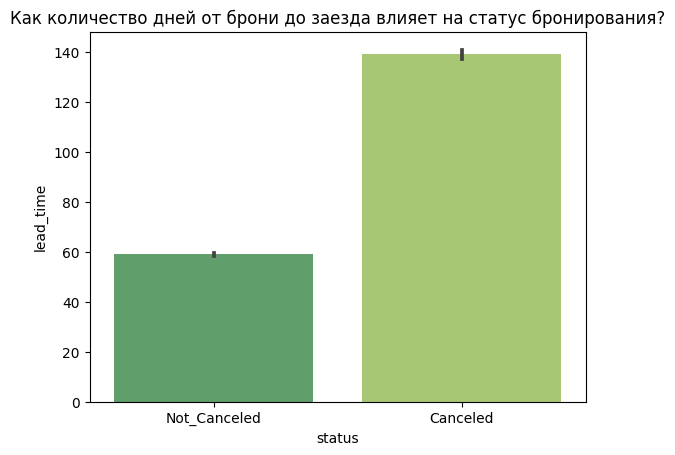

In [ ]:
sns.barplot(x='status', y='lead_time', data=data, palette='summer')
plt.title('Как количество дней от брони до заезда влияет на статус бронирования?')
plt.show()

Видим, что те клиенты, которые бронировали отель сильно заранее, чаще всего отменяют бронирование. Таким образом, можно предположить, что чем раньше человек бронирует, тем выше вероятность отмены.

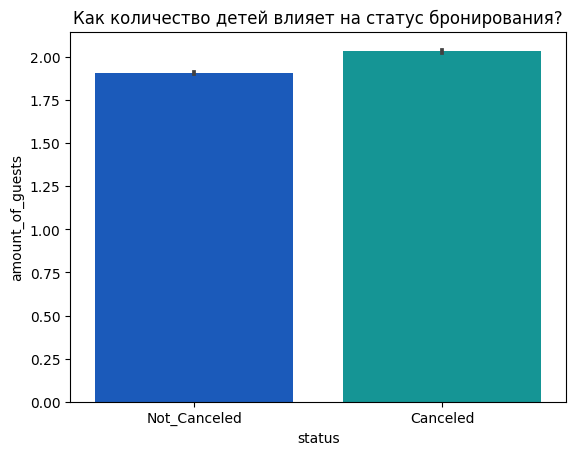

In [ ]:
sns.barplot(x='status', y='amount_of_guests', data=data, palette='winter')
plt.title('Как количество детей влияет на статус бронирования?')
plt.show()

Очевидно, что количество гостей не влияет на вероятность отмены бронирования.

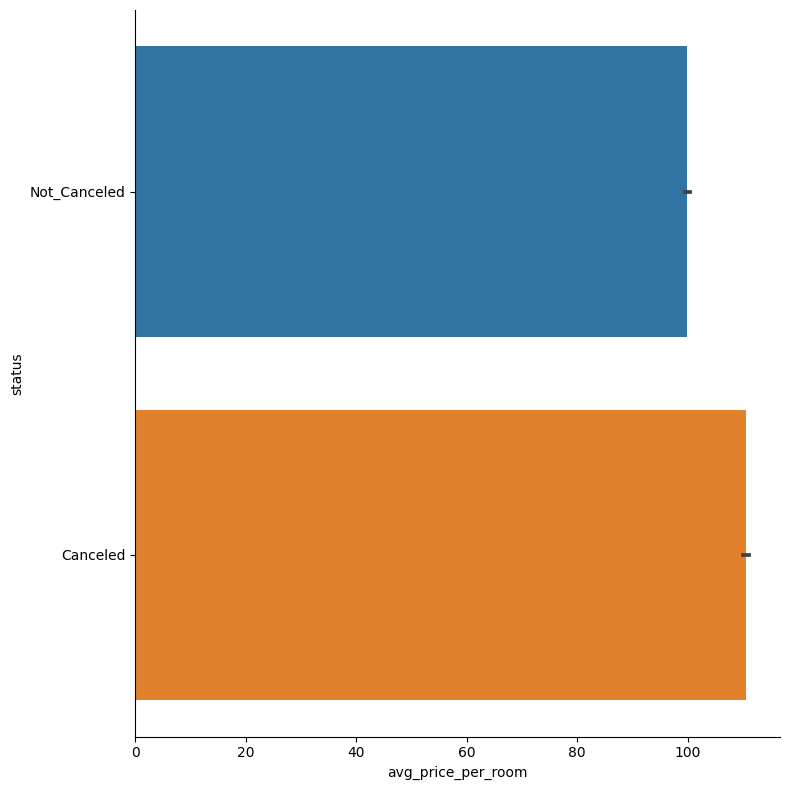

In [ ]:
sns.catplot(data=data, x = 'avg_price_per_room', y = 'status', kind='bar', height = 8)

В соответствии с графиком можно сказать, что стоимость номера совсем незначительно влияет на перспективу отмены бронирования.

In [ ]:
data.groupby('seasons')['status'].value_counts().to_frame()

status
seasons status              
Весна   Not_Canceled    5049
        Canceled        2643
Зима    Not_Canceled    4883
        Canceled         856
Лето    Not_Canceled    5843
        Canceled        4093
Осень   Not_Canceled    8615
        Canceled        4293

In [ ]:
seasons = ['Весна', 'Зима', 'Лето', 'Осень']
canceled = [2643, 856, 4093, 4293]
non_canceled = [5049, 4883, 5843, 8615]

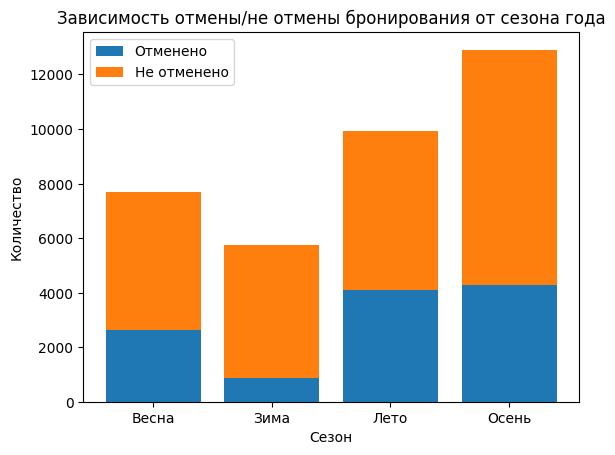

In [ ]:
plt.bar(seasons, canceled, label='Отменено')
plt.bar(seasons, non_canceled, bottom=canceled, label='Не отменено')
plt.legend()
plt.xlabel('Сезон')
plt.ylabel('Количество')
plt.title('Зависимость отмены/не отмены бронирования от сезона года')
plt.show()

Можно заметить, что больше всего гостей было осенью и летом. При этом можно также сказать, что осенью было больше отмен в абсолютном значении, чем в другие сезоны; зимой было больше всего отмен в процентном значении. Таким образом, сезон влияет на количество отмен.

In [ ]:
data.groupby('required_car_parking_space')['status'].value_counts().to_frame()

status
required_car_parking_space status              
0                          Not_Canceled   23380
                           Canceled       11771
1                          Not_Canceled    1010
                           Canceled         114

In [ ]:
car_parking = ['0','1']
canceled = [11771, 114]
non_canceled = [23380, 1010]

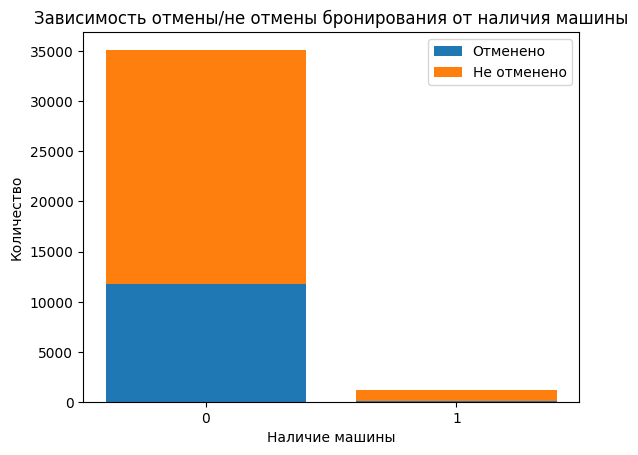

In [ ]:
plt.bar(car_parking, canceled, label='Отменено')
plt.bar(car_parking, non_canceled, bottom=canceled, label='Не отменено')
plt.legend()
plt.xlabel('Наличие машины')
plt.ylabel('Количество')
plt.title('Зависимость отмены/не отмены бронирования от наличия машины')
plt.show()

Можно сказать, что у большинства гостей нет машины. Вместе с тем, те, у кого её она есть, практически не отменяют свои бронирования. Среди тех, у кого машины нет, отменяют бронирование меньше трети гостей. Следовательно, наличие машины практически не влияет на перспективу отмены бронирования.

# Мы планируем обучать две модели: для предсказания цены и предсказания отмены/не отмены брони, EDA для них совпадают, а вот визуализации разные. Пока сделали визуализацию только для модели, которая будет выполнять задачу классификация (отменит или не отменит бронь), её получилось не очень много, но ещё добавим часть визуализации для второй модели.
